In [1]:
!pip install -U spacy

In [2]:
!python -m spacy download en_core_web_md

2023-09-04 06:14:11.336694: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 06:14:12.995604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip install wordcloud

In [4]:
!pip install nltk

In [5]:
import pandas as pd
import numpy as np
import spacy
import string

from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [6]:
nlp=spacy.load('en_core_web_md')

#1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [7]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [8]:
tweet=pd.read_csv('Elon_musk.csv', encoding='latin1', error_bad_lines=False)
tweet

<ipython-input-8-fcda69c98360>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweet=pd.read_csv('Elon_musk.csv', encoding='latin1', error_bad_lines=False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
tweet.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
tweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [11]:
tweet.shape

(1999, 1)

In [12]:
tweet.isna().sum()

Text    0
dtype: int64

In [13]:
tweet.duplicated().sum()

2

In [14]:
tweet[tweet.duplicated()]

,Text
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [15]:
tweet[tweet['Text']=='@westcoastbill Indeed']

,Text
139,@westcoastbill Indeed
655,@westcoastbill Indeed


In [16]:
tweet[tweet['Text']=='The most entertaining outcome is the most likely']

,Text
9,The most entertaining outcome is the most likely
324,The most entertaining outcome is the most likely


In [17]:
tweet.drop_duplicates(inplace=True)

In [18]:
tweet.duplicated().sum()

0

#Data cleaning

In [19]:
import string
import re
def clean_text(text):
  text=text.lower()
  text=re.sub('\[.*?\]', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub("[0-9" "]+"," ",text)
  text = re.sub('[‘’“”…]', '', text)
  text = re.sub('http\S+','', text)
  text=re.sub( '\x92','', text)
  return text

clean= lambda x: clean_text(x)

In [20]:
tweet['Text']= tweet.Text.apply(clean)

In [21]:
tweet

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [22]:
tweet=[x.strip() for x in tweet.Text]
tweet=[x for x in tweet if x]
tweet[0:5]

['im an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more']

In [23]:
len(tweet)

1964

In [24]:
data=pd.DataFrame()
data['tweet']=pd.Series(tweet)

In [25]:
data

,tweet
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1959,flcnhvy true it sounds so surreal but the nega...
1960,ppathole make sure to read ur terms amp condit...
1961,teslagong ppathole samwise gamgee
1962,ppathole altho dumb and dumber is


In [26]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [27]:
affin=pd.read_csv('Afinn.csv',sep= ',', encoding='latin-1')

In [28]:
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [29]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [30]:
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores
def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    for word in sentence:
      sent_score+= sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [31]:
data['sentiment_score']=data['tweet'].apply(calculate_sentiment)
data.head()

,tweet,sentiment_score
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
2,joerogan spotify great interview,3
3,doge is underestimated,-1
4,teslacn congratulations tesla china for amazin...,6


In [32]:
data['word count']=data['tweet'].str.split().apply(len)

In [33]:
data.head()

,tweet,sentiment_score,word count
0,im an alien,0,3
1,idaacarmack ray tracing on cyberpunk with hdr ...,0,13
2,joerogan spotify great interview,3,4
3,doge is underestimated,-1,3
4,teslacn congratulations tesla china for amazin...,6,17


In [34]:
len(data[data['sentiment_score']<0])

214

In [35]:
data[data['sentiment_score']<0]

,tweet,sentiment_score,word count
3,doge is underestimated,-1,3
6,frodo was the underdoge\nall thought he would ...,-2,13
14,joshmanmode he definitely has issues but the s...,-2,12
19,freewalletorg any crypto wallet that wont give...,-1,17
20,freewalletorg your app sucks,-3,4
...,...,...,...
1941,flcnhvy ppathole ihearttesla earning power pos...,-1,14
1955,kenyanwalstreet not actually a payout just a v...,-1,21
1956,ihearttesla no easy way to answer this in a tw...,-3,22
1959,flcnhvy true it sounds so surreal but the nega...,-3,22


In [36]:
data[data['sentiment_score']<=-5]

,tweet,sentiment_score,word count
41,univercurious extremely misleading image as do...,-5,16
179,naval also the road to hell is mostly paved w...,-7,12
1044,tesladri chananbos wholemarsblog the crash ab...,-5,20
1250,tjlk there are some eerie parallels between th...,-6,21
1368,lvaux kulpability tlowdon ethicalskeptic peopl...,-5,14
1505,ppathole the early investor part of tesla is...,-5,20
1545,universalsci asteroid impact risk is well unde...,-5,13
1685,neuroskeptic they dont fire all at once some g...,-6,19
1940,rationaletienne flcnhvy ppathole ihearttesla d...,-5,10


In [37]:
len(data[data['sentiment_score']<=-5])

9

<Axes: title={'center': 'sentence sentiment value to sentence word count'}, xlabel='word count', ylabel='sentiment_score'>

<Figure size 1500x1000 with 0 Axes>

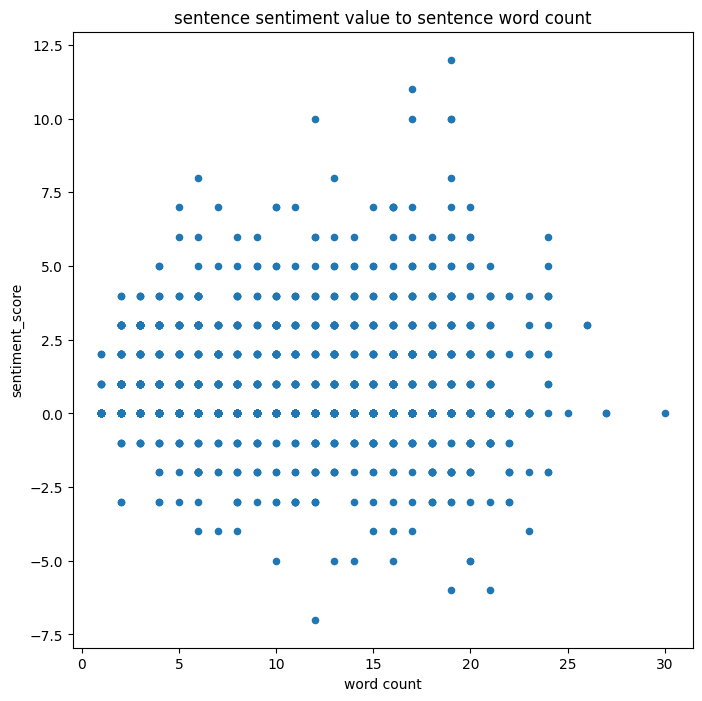

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
data.plot.scatter(x='word count', y='sentiment_score', figsize=(8,8),
                                  title='sentence sentiment value to sentence word count')

In [39]:
data['index']=range(0, len(data))

<Axes: xlabel='index', ylabel='sentiment_score'>

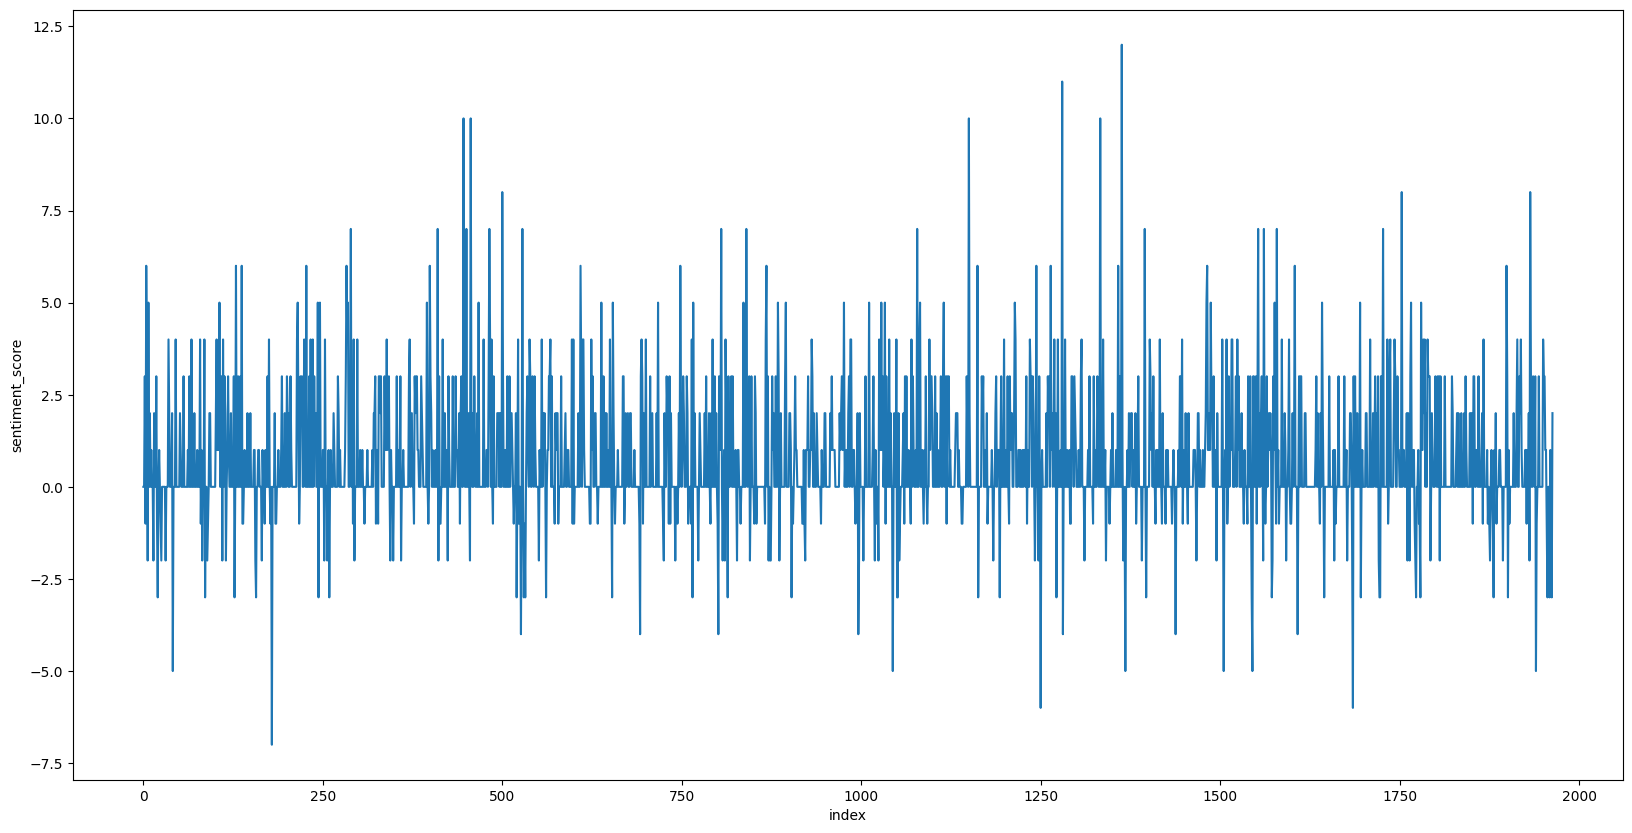

In [40]:
plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_score', x='index', data=data)

In [41]:
df=pd.DataFrame()
df['sentiment']=['Positive', 'negative', 'Neutral']
df['count'] =[len(data[data['sentiment_score']>0]), len(data[data['sentiment_score']<0]), len(data[data['sentiment_score']==0])]
df

,sentiment,count
0,Positive,738
1,negative,214
2,Neutral,1012


<Axes: ylabel='count'>

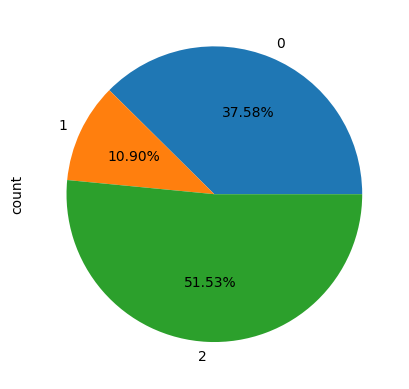

In [42]:
df['count'].plot(kind='pie',autopct='%1.2f%%')       #0 positive, 1=negative, 2=neutral

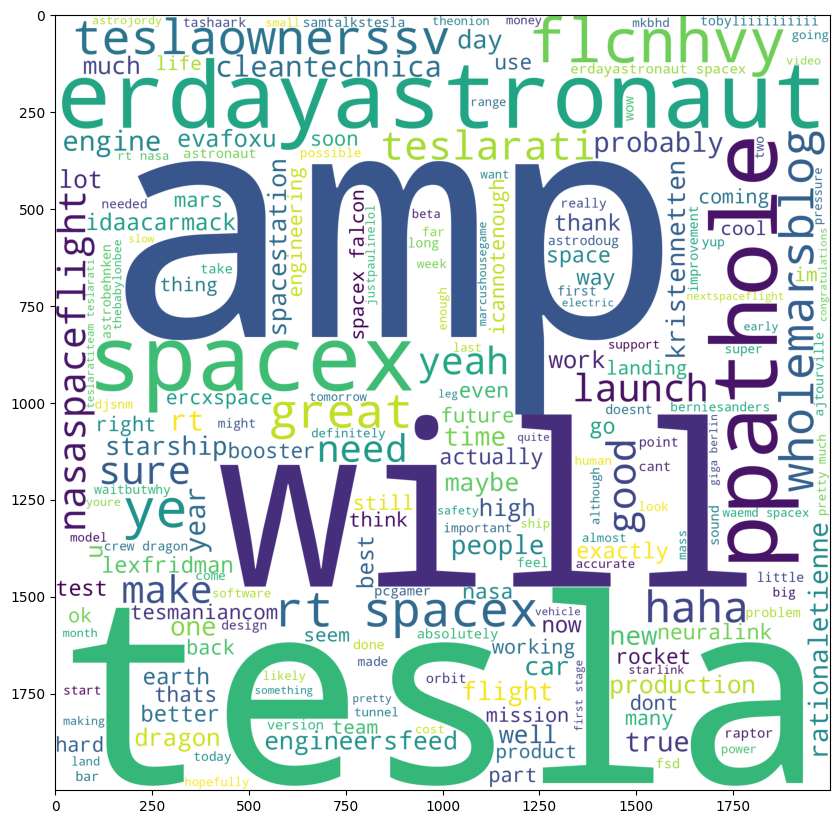

In [43]:
string_total=' '.join(data['tweet'])
from wordcloud import WordCloud
plt.figure(figsize=(10,20))
wordcloud=WordCloud(background_color='white', width=2000, height=2000, max_words=200).generate(string_total)
plt.imshow(wordcloud)

In [44]:
# sentiment analysis was done on Elon Musk tweet and wordcloud was plotted . Of all the tweets 10.9% were negative and 37.5 were positive and the rest were neutral

# TWO:
#1) Extract reviews of any product from ecommerce website like amazon
#2) Perform emotion mining

In [45]:
import requests
from bs4 import BeautifulSoup as bs

In [46]:
#extracting reviews on smart watch from snapdeal

In [73]:
smartwatch_snapdeal=[]
url1 = "https://www.snapdeal.com/product/coregenix-bt-calling-186-large/682887673537/reviews?page="
url2 = "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"
for i in range(1,10):
  ip=[]
  base_url = url1+str(i)+url2
  response = requests.get(base_url)
  soup = bs(response.content,"html.parser")
  temp = soup.findAll("div",attrs={"class","user-review"})
  for j in range(len(temp)):
    ip.append(temp[j].find("p").text)
  smartwatch_snapdeal=smartwatch_snapdeal+ip

In [74]:
smartwatch_snapdeal

['Wow i am so happy with my purchase, Best Smartwatch , MUST BUY !',
 'Display Quality is nice and big and it also connects with my smartphone. MUST BUY. Loved It !',
 'Classy display loved it .. Thankyou Snapdeal!',
 'Best smartwatch simply loved it , Thankyou snapdeal!',
 'I love the design and quality...very good HD screen...SIZE IS PERFECT',
 'Watch is very good, Display is awesome fit very comfortable,also connects with my phone',
 'Watch is very good, Display is awesome fit very comfortable,also connects with my phone']

In [77]:
smartwatch_snapdeal = list(set(smartwatch_snapdeal))

In [76]:
smartwatch_snapdeal

['I love the design and quality...very good HD screen...SIZE IS PERFECT',
 'Watch is very good, Display is awesome fit very comfortable,also connects with my phone',
 'Display Quality is nice and big and it also connects with my smartphone. MUST BUY. Loved It !',
 'Classy display loved it .. Thankyou Snapdeal!',
 'Wow i am so happy with my purchase, Best Smartwatch , MUST BUY !',
 'Best smartwatch simply loved it , Thankyou snapdeal!']

In [51]:
import pandas as pd

In [78]:
data=pd.DataFrame({'Text': smartwatch_snapdeal})


In [79]:
data

,Text
0,I love the design and quality...very good HD s...
1,"Watch is very good, Display is awesome fit ver..."
2,Display Quality is nice and big and it also co...
3,Classy display loved it .. Thankyou Snapdeal!
4,"Wow i am so happy with my purchase, Best Smart..."
5,"Best smartwatch simply loved it , Thankyou sna..."


In [80]:
data.shape

(6, 1)

In [81]:
data.isna().sum()

Text    0
dtype: int64

In [82]:
data.duplicated().sum()

0

In [57]:
import string
import spacy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
from wordcloud import WordCloud

In [83]:
data = [x.strip() for x in data.Text]
data=[x for x in data if x]

In [84]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))

In [86]:
sent_df=pd.DataFrame(sentences, columns=['sent'])
sent_df

,sent
0,I love the design and quality...very good HD s...
1,MUST BUY.
2,Loved It !
3,Classy display loved it .. Thankyou Snapdeal!
4,"Wow i am so happy with my purchase, Best Smart..."
5,"Best smartwatch simply loved it , Thankyou sna..."


In [62]:
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn (1).csv


In [63]:
affin=pd.read_csv('Afinn.csv', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [64]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [87]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores
def calculate_sentiment(text: str = None):
  sent_score=0
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
  return sent_score

In [88]:
sent_df['sent_value']= sent_df['sent'].apply(calculate_sentiment)
sent_df                                                                   #the review for smartwatch were all positive

,sent,sent_value
0,I love the design and quality...very good HD s...,20
1,MUST BUY.,0
2,Loved It !,3
3,Classy display loved it .. Thankyou Snapdeal!,6
4,"Wow i am so happy with my purchase, Best Smart...",7
5,"Best smartwatch simply loved it , Thankyou sna...",6


In [89]:
sent_df['word_count'] = sent_df['sent'].str.split().apply(len)
sent_df

,sent,sent_value,word_count
0,I love the design and quality...very good HD s...,20,38
1,MUST BUY.,0,2
2,Loved It !,3,3
3,Classy display loved it .. Thankyou Snapdeal!,6,7
4,"Wow i am so happy with my purchase, Best Smart...",7,14
5,"Best smartwatch simply loved it , Thankyou sna...",6,8


In [91]:
sent_df['index'] = range(0, len(sent_df))

<Axes: title={'center': 'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sent_value'>

<Figure size 300x300 with 0 Axes>

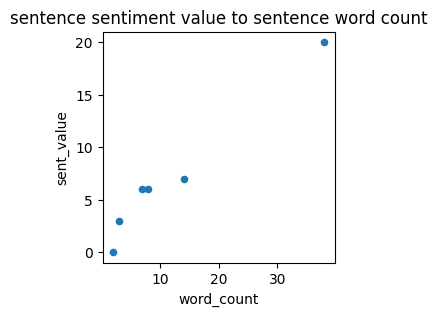

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
sent_df.plot.scatter(x='word_count', y='sent_value', figsize=(3,3),
                                  title='sentence sentiment value to sentence word count')

<Axes: xlabel='index', ylabel='sent_value'>

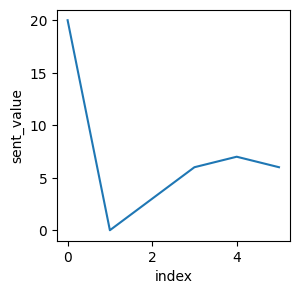

In [93]:
plt.figure(figsize=(3,3))
sns.lineplot(y='sent_value', x='index', data=sent_df)

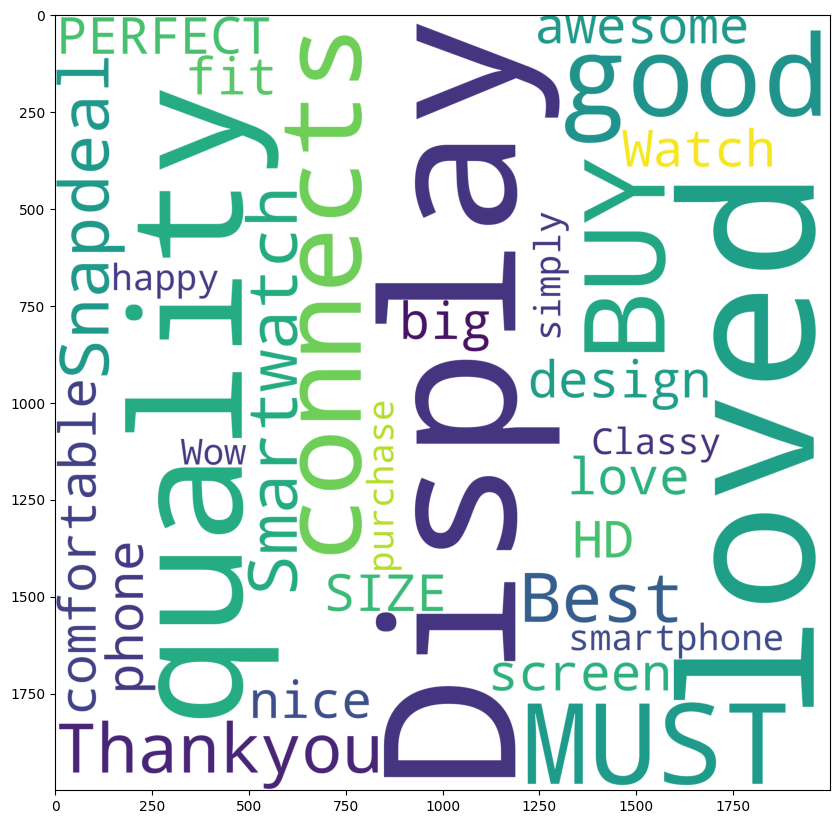

In [94]:
string_total=' '.join(sent_df['sent'])
from wordcloud import WordCloud
plt.figure(figsize=(10,20))
wordcloud=WordCloud(background_color='white', width=2000, height=2000, max_words=200).generate(string_total)
plt.imshow(wordcloud)